<a href="https://colab.research.google.com/github/JoelmirDias/IBM_Coursera/blob/main/Interpretable_Machine_Learning_Applications_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install eli5
!pip install pdpbox
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.6 MB/s 
     |████████████████████████████████| 133 kB 65.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b858e71141a9250a91593f39e2bf9890837db8838f2b51ccd6e9d45ff9d265bb
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

In [ ]:
data=pd.read_csv('/content/sample_data/FIFA 2018 Statistics.csv')

FileNotFoundError: ignored

In [ ]:
y=(data['Man of the Match']=='Yes')
feature_names=[i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)

In [ ]:
tree_model=DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_split=5).fit(train_X,train_y)
y_pred = tree_model.predict(val_X)

In [ ]:
cm = confusion_matrix(val_y, y_pred)
print(cm)
accuracy_score(val_y, y_pred)

[[ 9  7]
 [ 6 10]]


0.59375

In [ ]:
my_model=RandomForestClassifier(n_estimators=100,random_state=0).fit(train_X, train_y)
y_pred=my_model.predict(val_X)

In [ ]:
cm = confusion_matrix(val_y, y_pred)
print(cm)
accuracy_score(val_y, y_pred)

[[10  6]
 [ 4 12]]


0.6875

In [ ]:
perm=PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


In [ ]:
perm=PermutationImportance(tree_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


In [ ]:
feature_to_plot = 'Distance Covered (Kms)'

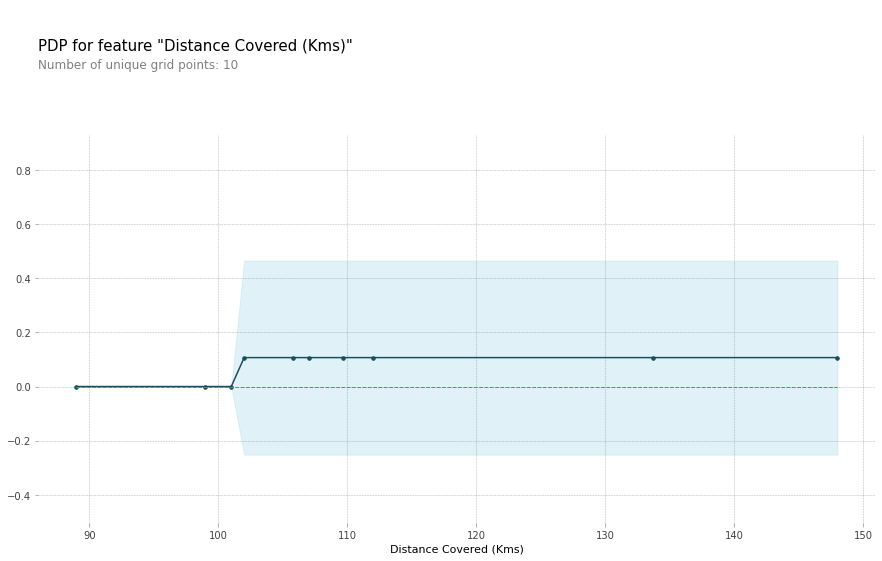

In [ ]:
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

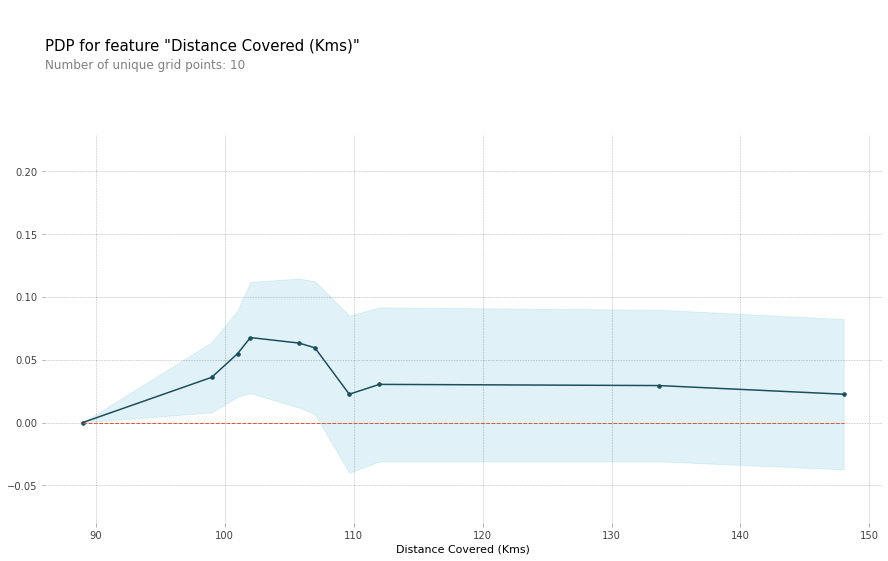

In [ ]:
pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [ ]:
feature_to_plot = 'Goal Scored'

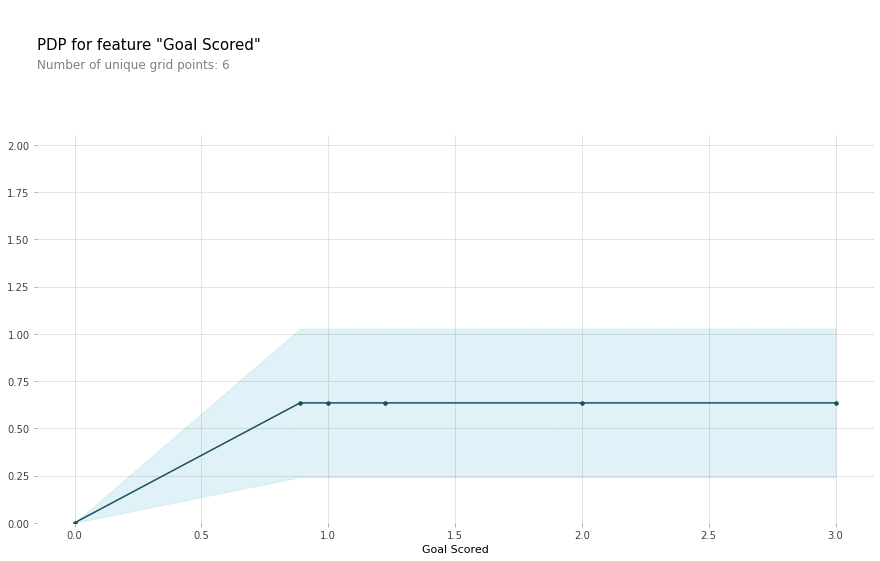

In [ ]:
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

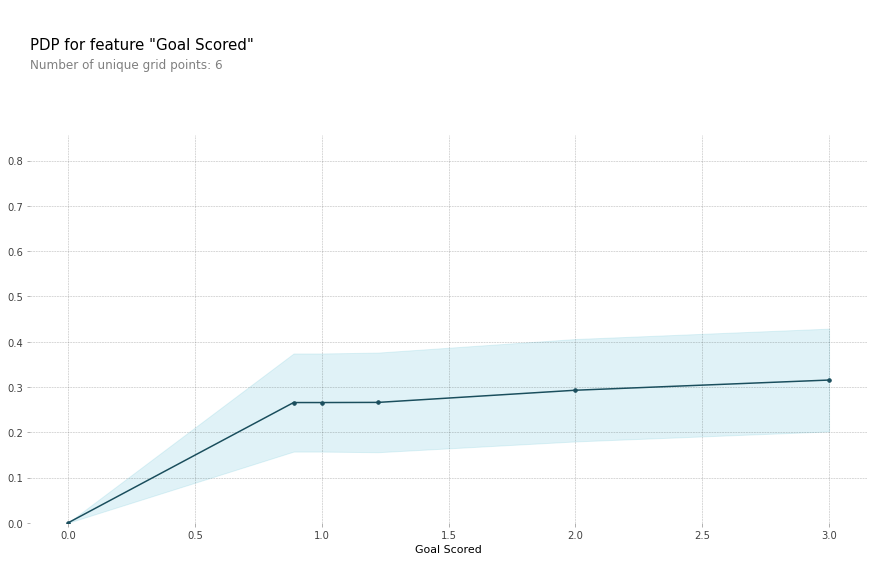

In [ ]:
pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()